# AD HOC 5


# 🏃‍♂️🤸‍♂️🏋️‍♀️ 




In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [3]:
# загружаем данные

workouts = pd.read_csv(r'C:\Users\vkoma\Downloads\.ipynb_checkpoints\workouts.csv', parse_dates=['start_at'])
users = pd.read_excel(r'C:\Users\vkoma\Downloads\.ipynb_checkpoints\users.xlsx')

# сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

In [4]:
trainings_by_day=workouts.resample('d', on  = 'start_at')['workout_id'].count().reset_index()

In [5]:
trainings_by_day.columns = ['start_at_day', 'c_workout_id']

In [6]:
trainings_by_day

,start_at_day,c_workout_id
0,2020-01-01,1
1,2020-01-02,4
2,2020-01-03,5
3,2020-01-04,5
4,2020-01-05,9
...,...,...
338,2020-12-04,365
339,2020-12-05,292
340,2020-12-06,250
341,2020-12-07,451


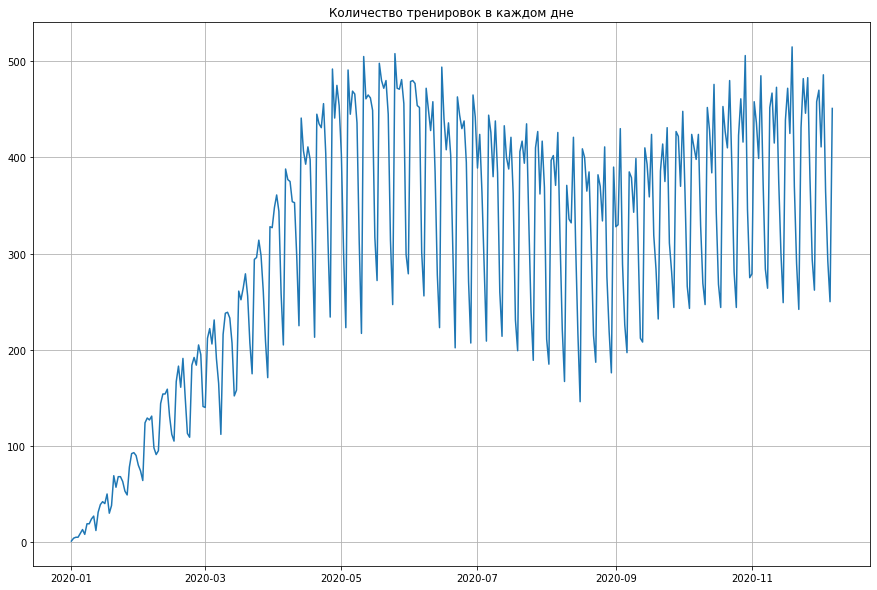

In [9]:
plt.figure (figsize= (15,10))
plt.title('Количество тренировок в каждом дне')

plt.plot(trainings_by_day.loc[trainings_by_day['start_at_day'] != '2020-12-08'] ['start_at_day'],
         trainings_by_day.loc[trainings_by_day['start_at_day'] != '2020-12-08'] ['c_workout_id'])
plt.grid()

#Линейный график, который показывает количество тренировок за каждый день. 

## Задание 2

При подсчете постоянных тренеров рассматриваем только тех, которые уже работали в нашей компании до 1 ноября. 
      


In [7]:
# выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

# множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [8]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [9]:
# кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем series в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [10]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

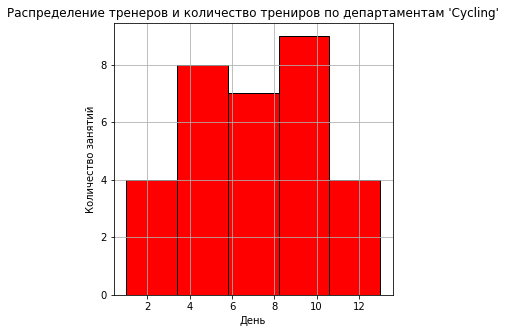

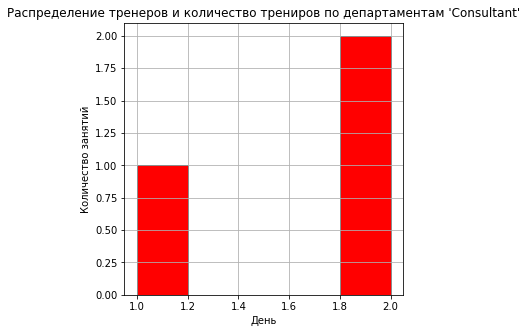

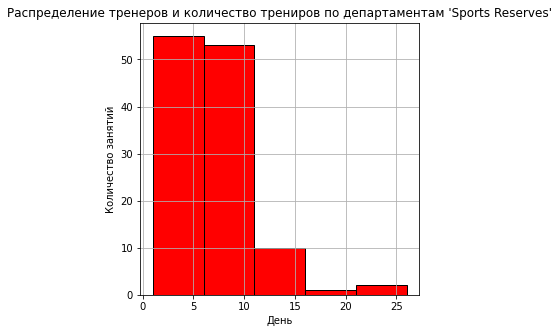

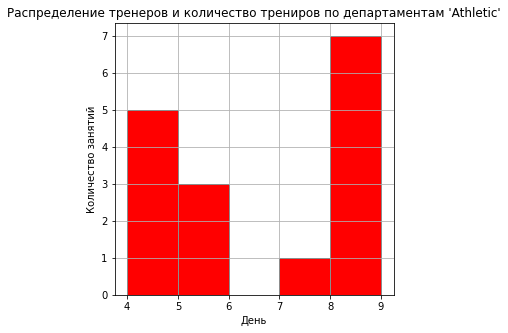

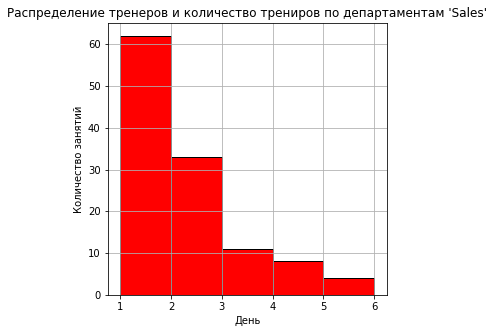

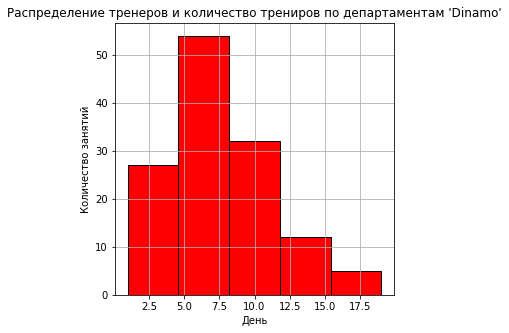

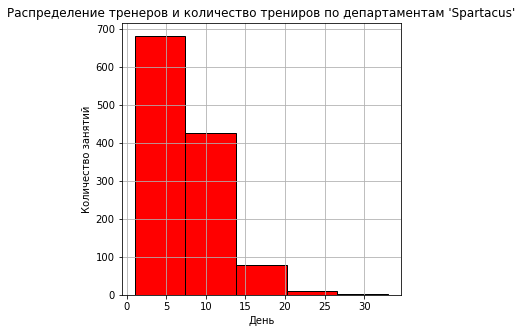

In [11]:
for department in departments:
    to_hist = workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == department]
    
    plt.subplots(figsize =(5,5))
    plt.hist(to_hist['workouts'],
            bins =5,
            color = 'red',
            edgecolor = 'black')
    plt.title(f"Распределение тренеров и количество трениров по департаментам '{department}'")
    plt.xlabel('День')
    plt.ylabel('Количество занятий')
    plt.grid(True)
    
#Гистограмму распределения количества тренеров по количеству проведенных тренировок.

In [12]:
workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


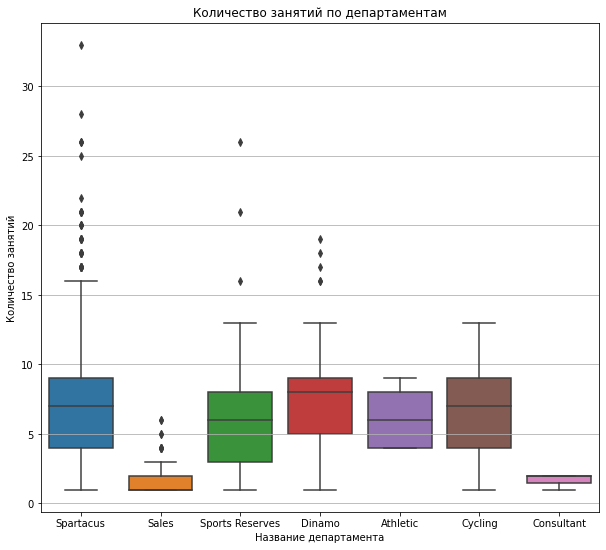

In [13]:
plt.figure(figsize =(10,9))
sns.boxplot(x = workouts_by_trainer['trainer_department'],
            y = workouts_by_trainer['workouts'])

plt.title('Количество занятий по департаментам')
plt.xlabel('Название департамента')
plt.ylabel('Количество занятий')
plt.grid(axis = 'y')

#boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.

In [14]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


In [27]:
a_data = workouts_users[['status', 'cost']].loc[workouts_users['workout_schedule_type']!='trial'].dropna().copy()


a_data['cost'] = a_data['cost'].apply(int)
a_data['failed'] = a_data.status.map({'failed_by_client': 1})
a_data['success'] = a_data.status.map({'success': 1})

a_data = a_data.groupby(['cost'])['failed', 'success'].sum().reset_index()
a_data['absent'] = a_data['failed'] / (a_data['success']  + a_data['failed']) * 100

a_data.head()

C:\Users\vkoma\AppData\Local\Temp\ipykernel_12436\4225939348.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a_data = a_data.groupby(['cost'])['failed', 'success'].sum().reset_index()


,cost,failed,success,absent
0,500,1152.0,3051.0,27.408994
1,750,15663.0,53221.0,22.738227
2,1000,4255.0,19888.0,17.624156
3,1500,381.0,2401.0,13.695183


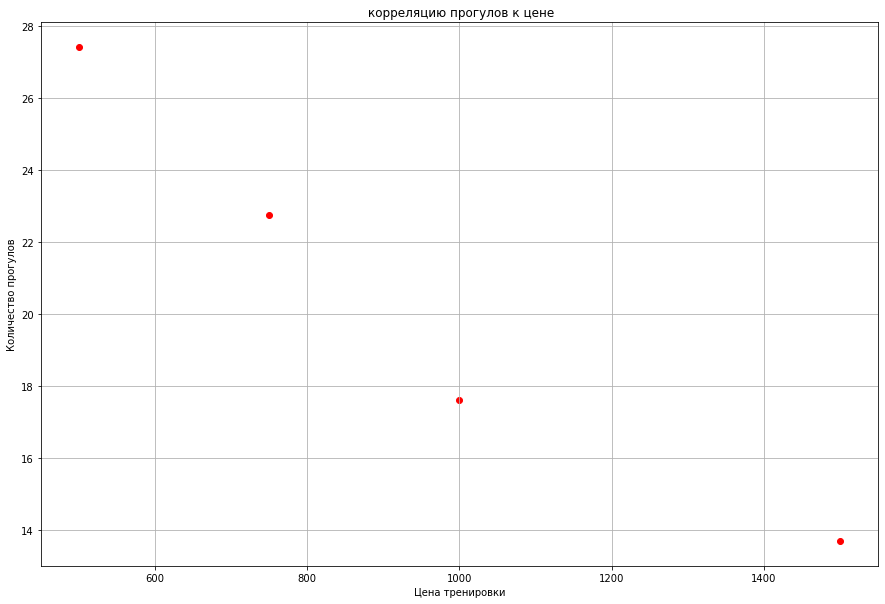

In [28]:
plt.figure (figsize= (15,10))
plt.title(' корреляцию прогулов к цене')

plt.scatter(a_data['cost'],
            a_data['absent'],
            color = 'red')
plt.xlabel('Цена тренировки')
plt.ylabel('Количество прогулов')
plt.grid()

In [29]:
age_a_data = workouts_users[['status', 'age']].loc[workouts_users['workout_schedule_type']!='trial'].dropna().copy()


age_a_data['age'] = age_a_data['age'].apply(int)
age_a_data['failed'] = age_a_data.status.map({'failed_by_client': 1})
age_a_data['success'] = age_a_data.status.map({'success': 1})

age_a_data = age_a_data.groupby(['age'])['failed', 'success'].sum().reset_index()
age_a_data['absent'] = age_a_data['failed'] / (age_a_data['success']  + age_a_data['failed']) * 100

age_a_data.head()

C:\Users\vkoma\AppData\Local\Temp\ipykernel_12436\116158193.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_a_data = age_a_data.groupby(['age'])['failed', 'success'].sum().reset_index()


,age,failed,success,absent
0,4,11.0,33.0,25.000000
1,5,4.0,4.0,50.000000
2,6,8.0,29.0,21.621622
3,7,28.0,88.0,24.137931
4,8,80.0,241.0,24.922118


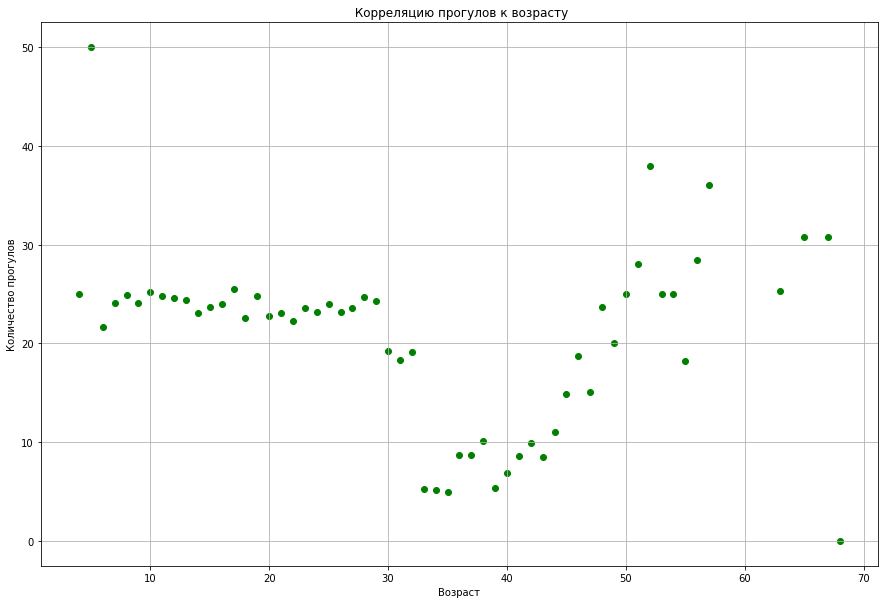

In [32]:
plt.figure (figsize= (15,10))
plt.title(' Корреляцию прогулов к возрасту')

plt.scatter(age_a_data['age'],
            age_a_data['absent'],
            color = 'green')
plt.xlabel('Возраст')
plt.ylabel('Количество прогулов')
plt.grid()

#скаттерплот, который показывает корреляцию прогулов к возрасту

In [33]:
cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


In [34]:
cost_age_data_agg['cost'].unique()

array([ 500,  750, 1000, 1500], dtype=int64)

In [42]:
price_color = {500: 'red',
               700 : 'deeppink',
               1000 : 'blue',
               1500 : 'black'}

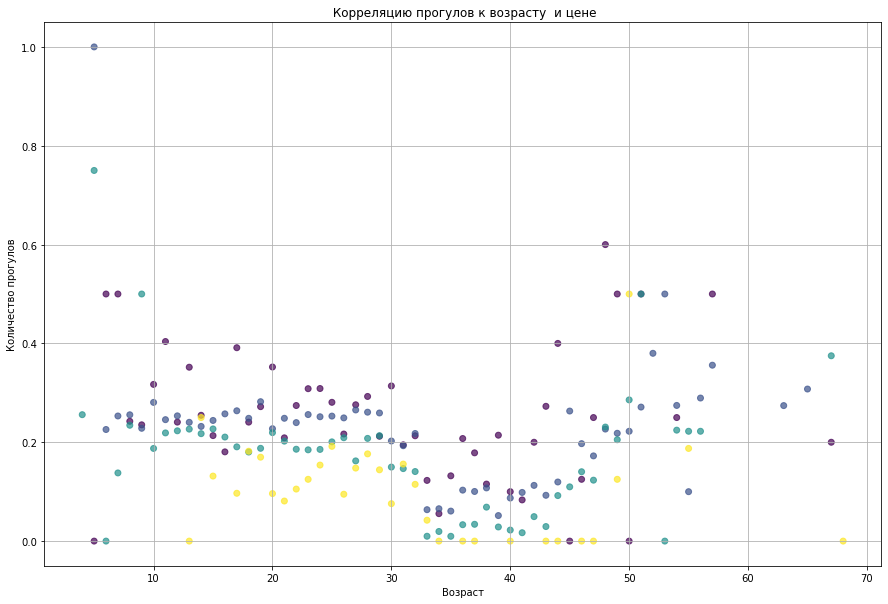

In [45]:
plt.figure (figsize= (15,10))
plt.title(' Корреляцию прогулов к возрасту  и цене')

plt.scatter(cost_age_data_agg['age'],
            cost_age_data_agg['status'],
            c = cost_age_data_agg['cost'], #выдает ошибку, задала автоматический , чтобы определеялся цвет по цене 
            alpha = 0.7)
plt.xlabel('Возраст')
plt.ylabel('Количество прогулов')
plt.grid()

#скаттерплот, который показывает корреляцию прогулов и к возрасту, и к цене одновременно

In [68]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [69]:
# кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,0-20,0.249445
9,750,21-25,0.250124


In [70]:
cost_age_pivot = cost_age_data_agg.pivot(index ='age_bin', columns = 'cost')

In [71]:
cost_age_pivot
#сводная таблица (матрица), в которой строками это интервалы возраста, столбцами — цена занятия, значением — доля прогулов.

status                              
cost         500       750       1000      1500
age_bin                                        
0-20     0.286578  0.249445  0.206955  0.133663
21-25    0.283505  0.250124  0.190771  0.158784
26-30    0.255597  0.249445  0.191932  0.124706
31-35    0.165217  0.128114  0.069580  0.100313
36-40    0.175573  0.097115  0.035191  0.000000
41-45    0.191489  0.109646  0.067100  0.000000
46-50    0.285714  0.198748  0.171171  0.097561
50+      0.307692  0.296992  0.239130  0.176471

In [66]:
cost_age_pivot

status                               500 750 1000 1500
cost          500       750      1000      1500                  
age_bin                                                          
0-20     0.286578  0.249445  0.206955  0.133663   2   2    2    2
21-25    0.283505  0.250124  0.190771  0.158784   2   2    2    2
26-30    0.255597  0.249445  0.191932  0.124706   2   2    2    2
31-35    0.165217  0.128114  0.069580  0.100313   2   2    2    2
36-40    0.175573  0.097115  0.035191  0.000000   2   2    2    2
41-45    0.191489  0.109646  0.067100  0.000000   2   2    2    2
46-50    0.285714  0.198748  0.171171  0.097561   2   2    2    2
50+      0.307692  0.296992  0.239130  0.176471   2   2    2    2

Text(114.0, 0.5, ' Возраст')

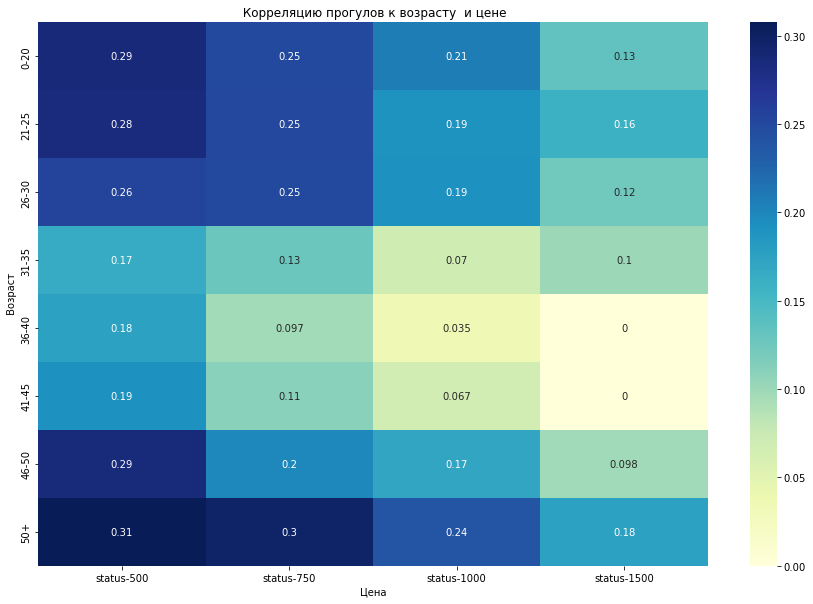

In [81]:
plt.figure (figsize= (15,10))
plt.title(' Корреляцию прогулов к возрасту  и цене')

sns.heatmap(cost_age_pivot, 
            cmap = 'YlGnBu',
            annot = True) #Добавляем подписи 
plt.xlabel('Цена')
plt.ylabel(' Возраст')
